# Background:
A US bike-sharing provider BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

<li>Which variables are significant in predicting the demand for shared bikes?</li>
<li>How well those variables describe the bike demands? </li>

    
# Business Goal:
Model the demand for shared bikes with the available independent variables which will be used by the management to understand how exactly the demands vary with different features. 

### Step 0: Setting currennt working directory

In [358]:
import os
os.chdir("C:/Users/visha/Python Projects/Bike Sharing Assignment/")
notebook_path = os.getcwd()
print(notebook_path)

C:\Users\visha\Python Projects\Bike Sharing Assignment


### Step 1: Import necessary packages & libraries

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels
import statsmodels.api as sm

### Step 2: Reading and Understanding the Data

#### Read / Load the data

In [360]:
bike = pd.read_csv('day.csv')  # Load dataset
bike.shape

(730, 16)

<b>Finding: </b> Row and column info matches with raw file. So, data has been fully loaded

#### Inspect the various aspects of the housing dataframe

In [361]:
bike.head() #check for headers

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [362]:
bike.tail() #check for footer data

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729

<b>Finding: </b> There are no header and footer rows

In [363]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### None of the columns have missing values, so missing value treatment is not required

#### Observation:
<li>As per business requirement, column "cnt" is the target variable.</li>
<li>It seems that column "cnt" is the sum of columns "casual" and "registered" </li>
<li>Since, these 3 columns will be highly correlated, let's remove columns "casual" and "registered" from our dataset</li>

#### Alternatively:
We may want to build 2 separate models, one with "casual" as the target variable 
and another with "registered" as the target variable and then combine the outputs to get "cnt" and see if this
composite model gives better results. <b><i>Not in scope for this assignment though.</i></b>

#### Drop columns that are not needed

Since, column "cnt" is our Target Variable, let's drop the columns "casual" and "registered"
Drop column "instant" as it is a unique identifier and will add no value to the model. 

In [364]:
bike.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)

In [365]:
bike.shape

(730, 13)

#### Convert data type of dteday to datetime

In [366]:
bike['dteday']=pd.to_datetime(bike['dteday'])
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 74.3 KB


In [367]:
# Extract day of the week
bike['day_of_week'] = bike['dteday'].dt.day_name()  # e.g., "Monday", "Tuesday"

# Extract day of the week (Monday=0, Sunday=6)
bike['dow'] = bike['dteday'].dt.weekday

# Extract week number
bike['week_number'] = bike['dteday'].dt.isocalendar().week  # ISO week number

# Extract day of the month
bike['day'] = bike['dteday'].dt.day

In [368]:
#Find number of days since the bike operation is working from the data available.
bike_service_start_date = bike['dteday'].min()
bike['days_since_bike_service_start_date'] = (bike['dteday'] - bike_service_start_date).dt.days

#### Since we have already extracted all info from the column 'dteday' we can drop this column

In [369]:
bike.drop(['dteday'], axis=1, inplace=True)

In [370]:
bike.describe(percentiles=[0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95])

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
5%       1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
10%      1.000000    0.000000    2.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
90%      4.000000    1.000000   11.000000    0.000000    6.000000    1.000000   
95%      4.000000    1.000000   12.000000    0.000000    6.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.544807    7.506729    8.150308   14.237589    5.195841   
min      1.000000    2.424346    3.953480    0.000000    1.500244   
5%       1.000000    8.747024   11.030712   40.741735    5.326052   
10%      1.000000   10.653165   12.752280   45.000000    6.704754   
25%      1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000   20.465826   24.368225   62.625000   12.125325   
75%      2.000000   26.880615   30.445775   72.989575   15.625589   
90%      2.000000   29.998347   33.908210   81.762500   19.833997   
95%      2.000000   31.520460   35.749975   86.868735   22.999988   
max      3.000000   35.328347   42.044800   97.250000   34.000021   

               cnt         dow  week_number         day  \
count   730.000000  730.000000   730.000000  730.000000   
mean   4508.006849    2.993151    26.430137   15.720548   
std    1936.011647    2.003072    15.057227    8.802278   
min      22.000000    0.000000     1.000000    1.000000   
5%     1330.000000    0.000000     3.000000    2.000000   
10%    1742.600000    0.000000     6.000000    4.000000   
25%    3169.750000    1.000000    13.000000    8.000000   
50%    4548.500000    3.000000    26.000000   16.000000   
75%    5966.000000    5.000000    39.000000   23.000000   
90%    7293.800000    6.000000    47.000000   28.000000   
95%    7576.400000    6.000000    50.000000   29.000000   
max    8714.000000    6.000000    52.000000   31.000000   

       days_since_bike_service_start_date  
count                          730.000000  
mean                           364.500000  
std                            210.877136  
min                              0.000000  
5%                              36.450000  
10%                             72.900000  
25%                            182.250000  
50%                            364.500000  
75%                            546.750000  
90%                            656.100000  
95%                            692.550000  
max                            729.000000

### Step 3: Visualizing the Data

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Axes: >

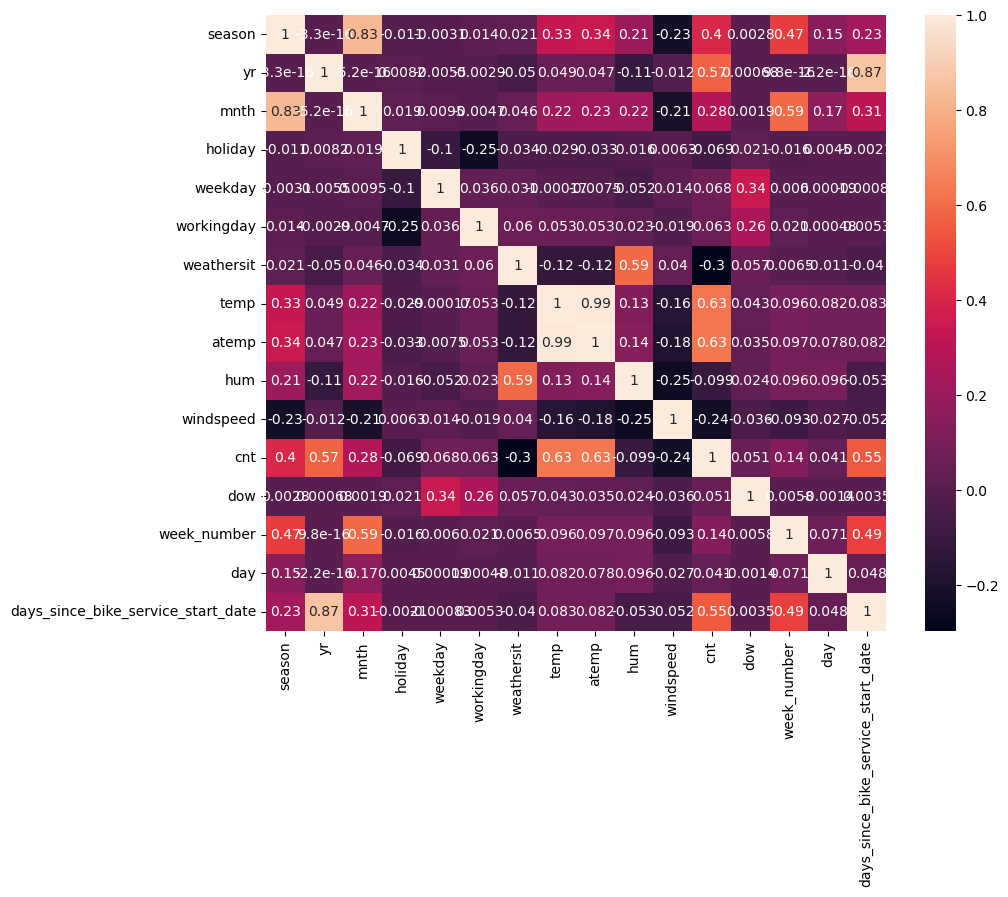

In [371]:
# Set the figure size
plt.figure(figsize=(10, 8)) 
sns.heatmap(bike.corr(),annot=True)

In [372]:
bike.corr().round(2)

season    yr  mnth  holiday  weekday  \
season                                1.00 -0.00  0.83    -0.01    -0.00   
yr                                   -0.00  1.00 -0.00     0.01    -0.01   
mnth                                  0.83 -0.00  1.00     0.02     0.01   
holiday                              -0.01  0.01  0.02     1.00    -0.10   
weekday                              -0.00 -0.01  0.01    -0.10     1.00   
workingday                            0.01 -0.00 -0.00    -0.25     0.04   
weathersit                            0.02 -0.05  0.05    -0.03     0.03   
temp                                  0.33  0.05  0.22    -0.03    -0.00   
atemp                                 0.34  0.05  0.23    -0.03    -0.01   
hum                                   0.21 -0.11  0.22    -0.02    -0.05   
windspeed                            -0.23 -0.01 -0.21     0.01     0.01   
cnt                                   0.40  0.57  0.28    -0.07     0.07   
dow                                   0.00  0.00  0.00     0.02     0.34   
week_number                           0.47  0.00  0.59    -0.02     0.01   
day                                   0.15 -0.00  0.17     0.00     0.00   
days_since_bike_service_start_date    0.23  0.87  0.31    -0.00    -0.00   

                                    workingday  weathersit  temp  atemp   hum  \
season                                    0.01        0.02  0.33   0.34  0.21   
yr                                       -0.00       -0.05  0.05   0.05 -0.11   
mnth                                     -0.00        0.05  0.22   0.23  0.22   
holiday                                  -0.25       -0.03 -0.03  -0.03 -0.02   
weekday                                   0.04        0.03 -0.00  -0.01 -0.05   
workingday                                1.00        0.06  0.05   0.05  0.02   
weathersit                                0.06        1.00 -0.12  -0.12  0.59   
temp                                      0.05       -0.12  1.00   0.99  0.13   
atemp                                     0.05       -0.12  0.99   1.00  0.14   
hum                                       0.02        0.59  0.13   0.14  1.00   
windspeed                                -0.02        0.04 -0.16  -0.18 -0.25   
cnt                                       0.06       -0.30  0.63   0.63 -0.10   
dow                                       0.26        0.06  0.04   0.04  0.02   
week_number                               0.02        0.01  0.10   0.10  0.10   
day                                       0.00       -0.01  0.08   0.08  0.10   
days_since_bike_service_start_date        0.01       -0.04  0.08   0.08 -0.05   

                                    windspeed   cnt   dow  week_number   day  \
season                                  -0.23  0.40  0.00         0.47  0.15   
yr                                      -0.01  0.57  0.00         0.00 -0.00   
mnth                                    -0.21  0.28  0.00         0.59  0.17   
holiday                                  0.01 -0.07  0.02        -0.02  0.00   
weekday                                  0.01  0.07  0.34         0.01  0.00   
workingday                              -0.02  0.06  0.26         0.02  0.00   
weathersit                               0.04 -0.30  0.06         0.01 -0.01   
temp                                    -0.16  0.63  0.04         0.10  0.08   
atemp                                   -0.18  0.63  0.04         0.10  0.08   
hum                                     -0.25 -0.10  0.02         0.10  0.10   
windspeed                                1.00 -0.24 -0.04        -0.09 -0.03   
cnt                                     -0.24  1.00  0.05         0.14  0.04   
dow                                     -0.04  0.05  1.00         0.01 -0.00   
week_number                             -0.09  0.14  0.01         1.00  0.07   
day                                     -0.03  0.04 -0.00         0.07  1.00   
days_since_bike_service_start_date      -0.05  0.55  0.00         0.49  0.05   

    

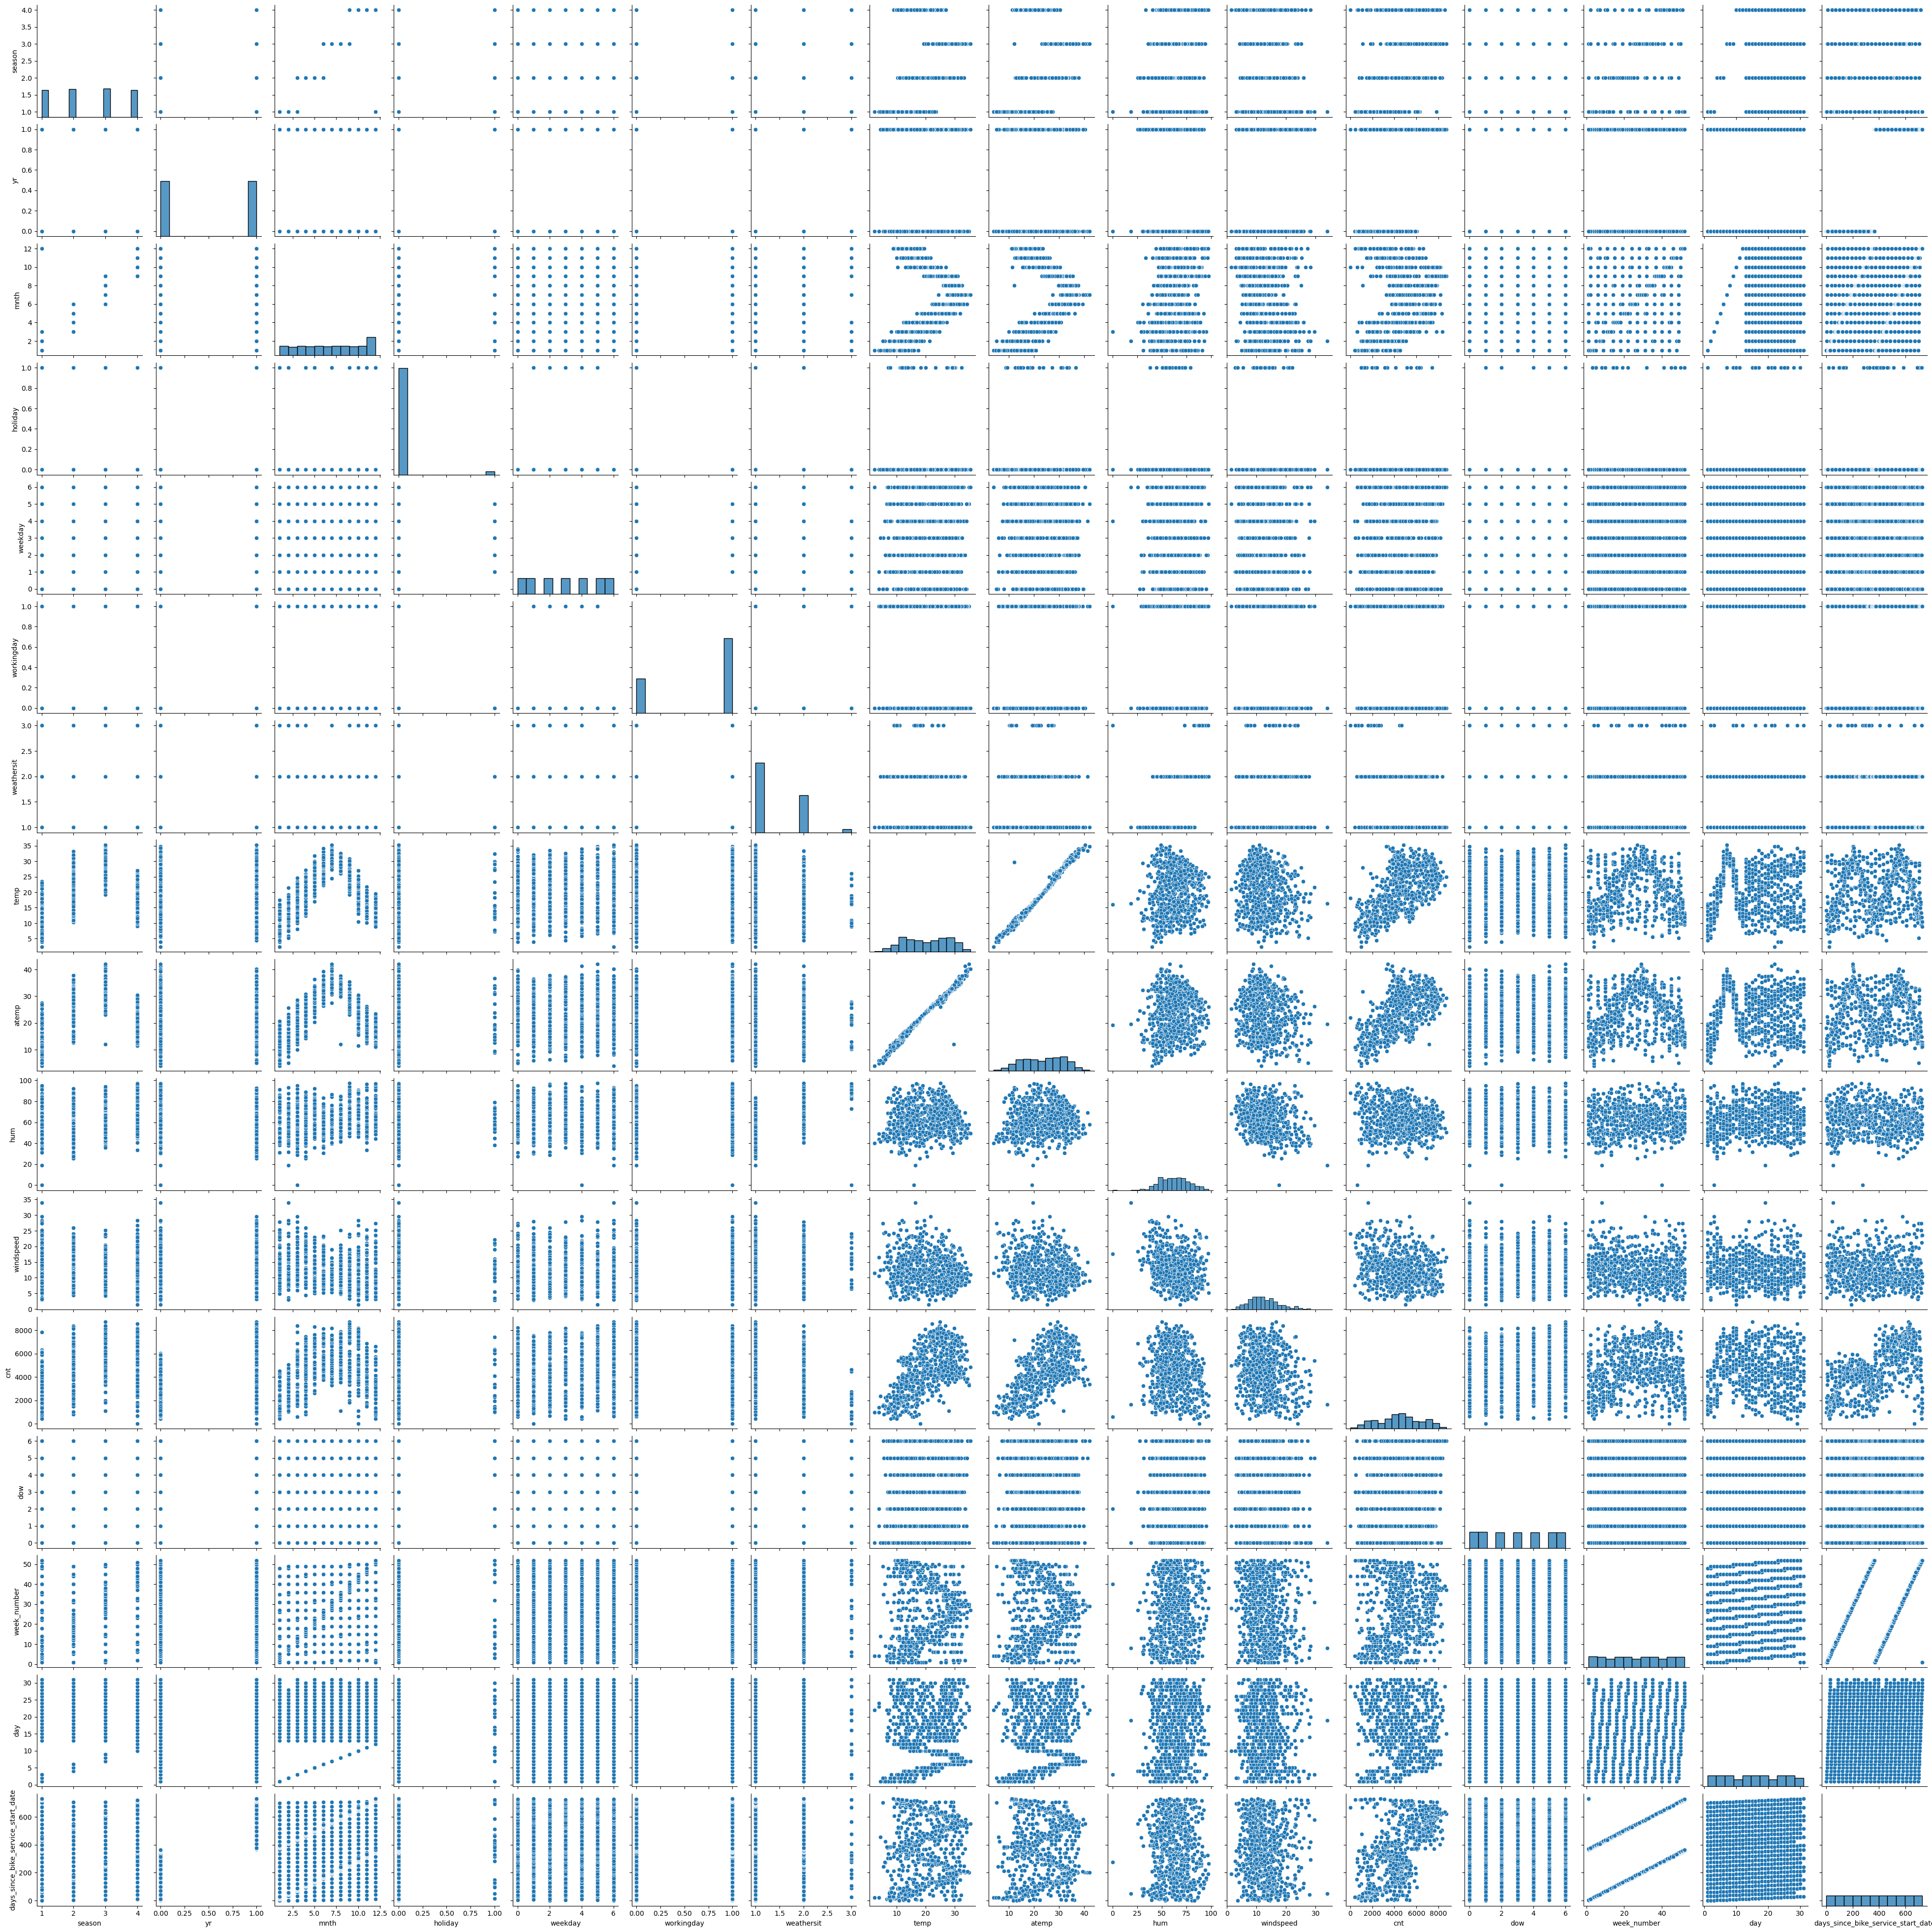

In [373]:
sns.pairplot(bike)
plt.show()

In [374]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    int64  
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    int64  
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    int64  
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    int64  
 7   temp                                730 non-null    float64
 8   atemp                               730 non-null    float64
 9   hum                                 730 non-null    float64
 10  windspeed                           730 non-null    float64
 11  cnt                                 730 non-n

#### Perform Cyclic Encoding for months and day of week

Cyclic encoding is a technique used to represent cyclical or periodic variables (e.g., "month," "day of the week," "hour of the day") in a way that captures their cyclical nature. It transforms these variables into two continuous features: a sine (sin) and a cosine (cos) component.

Why Cyclic Encoding?
Cyclic variables have a repeating nature, where the end of the cycle is connected to its start. For example:

Months: December (12) transitions to January (1).
Days of the week: Sunday transitions to Monday.
Hours: 23:00 transitions to 00:00.
Simple numerical encoding (e.g., January = 1, February = 2, ..., December = 12) doesn't reflect this continuity, which can mislead models. Cyclic encoding preserves the relationships between adjacent values and accounts for their periodicity.

In [375]:
bike['Month_Sin'] = np.sin(2 * np.pi * bike['mnth'] / 12)
bike['Month_Cos'] = np.cos(2 * np.pi * bike['mnth'] / 12)

bike['DoW_Sin'] = np.sin(2 * np.pi * bike['dow'] / 7)
bike['DoW_Cos'] = np.cos(2 * np.pi * bike['dow'] / 7)

#### Using data dictionary identify numeric and categorical variables

In [376]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    int64  
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    int64  
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    int64  
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    int64  
 7   temp                                730 non-null    float64
 8   atemp                               730 non-null    float64
 9   hum                                 730 non-null    float64
 10  windspeed                           730 non-null    float64
 11  cnt                                 730 non-n

In [377]:
ctg_col = ['season', 'yr','holiday','workingday','weathersit','day_of_week']
num_col = ['mnth','weekday','temp','atemp','hum','windspeed','cnt','day','week_number','Month_Sin','Month_Cos','dow','week_number', 'days_since_bike_service_start_date', 'Month_Sin','Month_Cos','DoW_Sin','DoW_Cos']

In [378]:
for col in ctg_col:
    #print(data[col].value_counts())
    result = bike.groupby(bike[col])['cnt'].agg(['count', 'sum','mean']).round(2)
    print(result)

        count      sum     mean
season                         
1         180   469514  2608.41
2         184   918589  4992.33
3         188  1061129  5644.30
4         178   841613  4728.16
    count      sum     mean
yr                         
0     365  1243103  3405.76
1     365  2047742  5610.25
         count      sum    mean
holiday                        
0          709  3212410  4530.9
1           21    78435  3735.0
            count      sum     mean
workingday                         
0             231  1000269  4330.17
1             499  2290576  4590.33
            count      sum     mean
weathersit                         
1             463  2257952  4876.79
2             246   995024  4044.81
3              21    37869  1803.29
             count     sum     mean
day_of_week                        
Friday         104  486122  4674.25
Monday         105  454865  4332.05
Saturday       104  480231  4617.61
Sunday         104  472825  4546.39
Thursday       104  478361  

In [379]:
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  ...   cnt  day_of_week dow  week_number  day  \
0  18.18125  80.5833  ...   985       Monday   0            1    1   
1  17.68695  69.6087  ...   801     Thursday   3            5    1   
2   9.47025  43.7273  ...  1349     Thursday   3            9    1   
3  10.60610  59.0435  ...  1562       Sunday   6           13    1   
4  11.46350  43.6957  ...  1600      Tuesday   1           18    1   

   days_since_bike_service_start_date  Month_Sin  Month_Cos   DoW_Sin  \
0                                   0        0.5   0.866025  0.000000   
1                                  31        0.5   0.866025  0.433884   
2                                  59        0.5   0.866025  0.433884   
3                                  90        0.5   0.866025 -0.781831   
4                                 120        0.5   0.866025  0.781831   

    DoW_Cos  
0  1.000000  
1 -0.900969  
2 -0.900969  
3  0.623490  
4  0.623490  

[5 rows x 21 columns]

### Visualising Categorical Variables

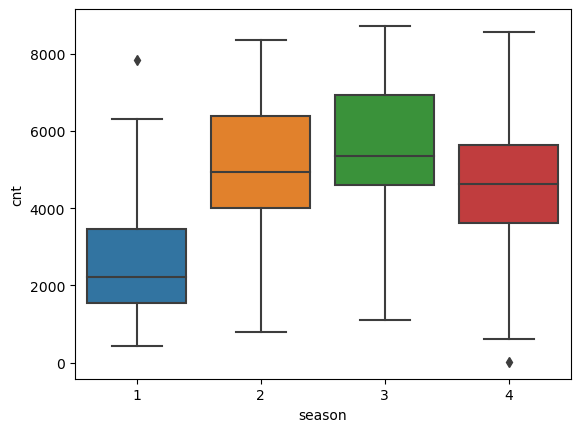

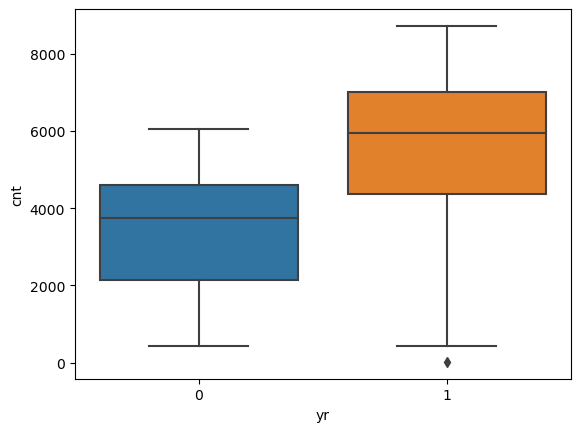

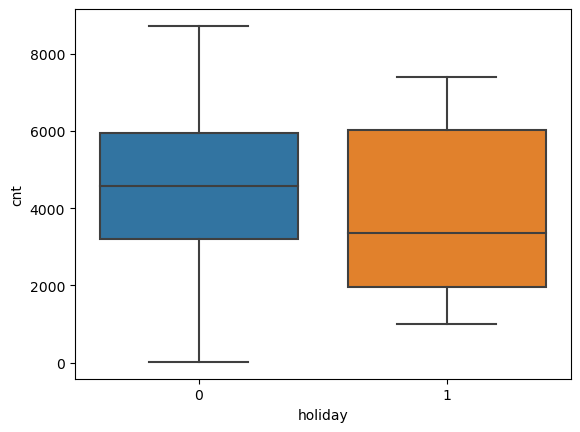

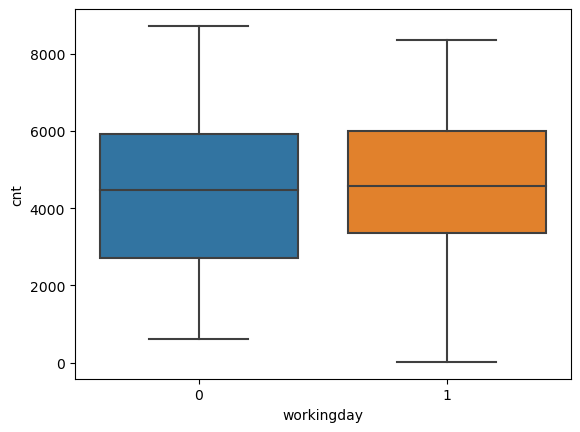

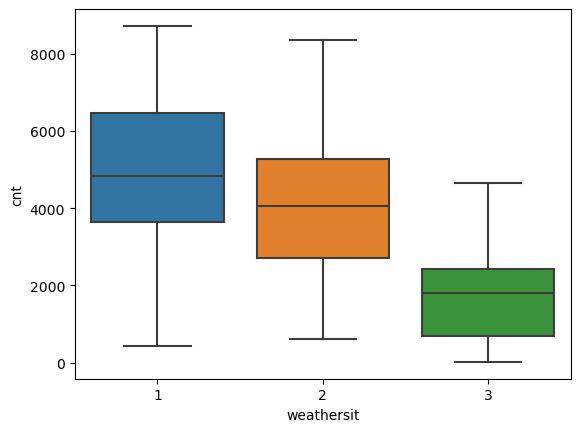

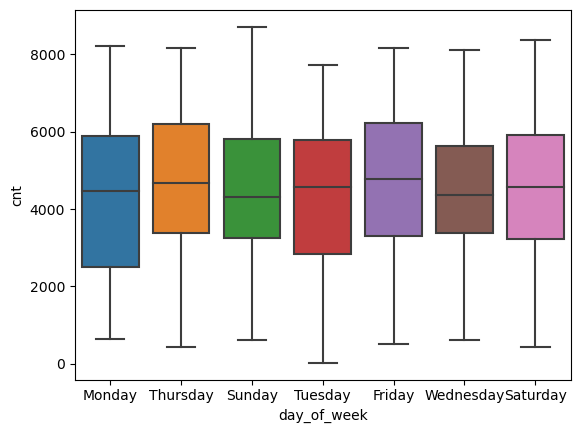

In [380]:
for i in range(len(ctg_col)):
    
    sns.boxplot(x = ctg_col[i], y = 'cnt', data = bike)
    plt.show()



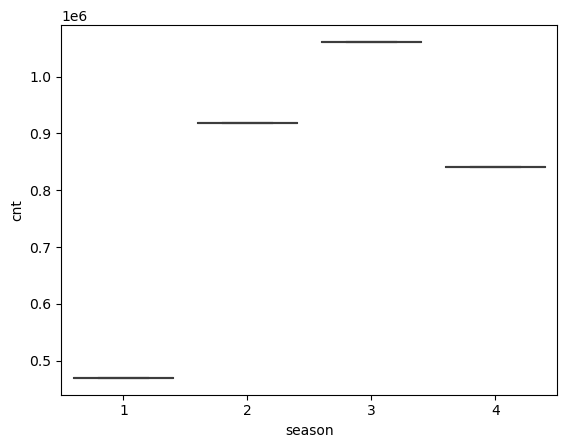

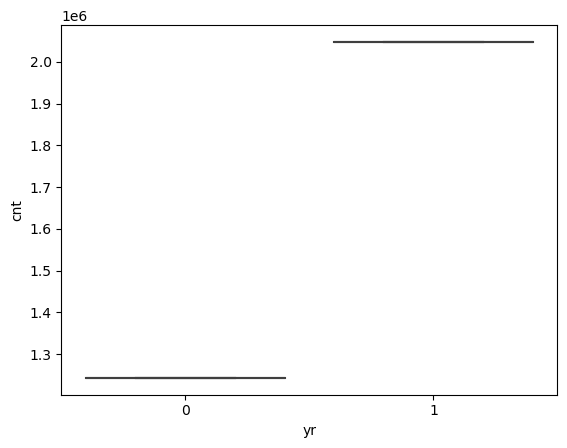

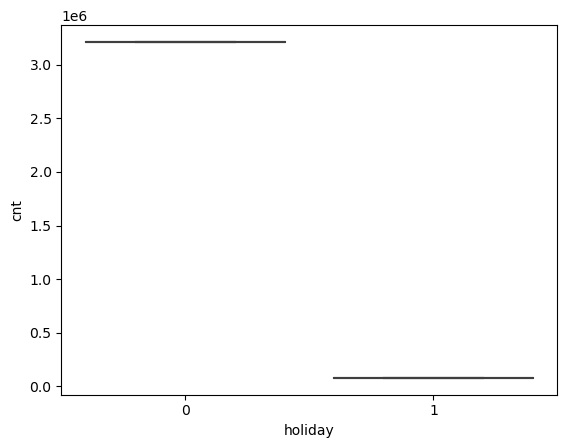

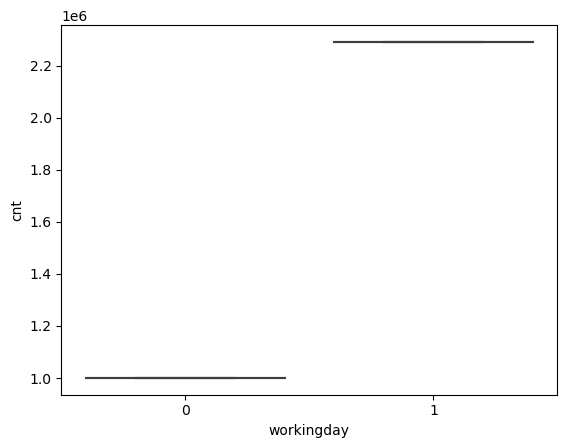

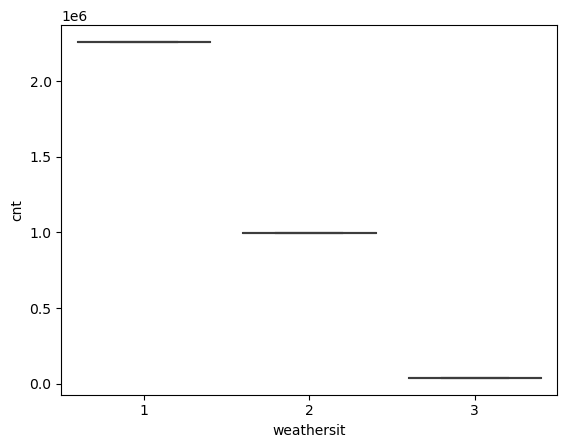

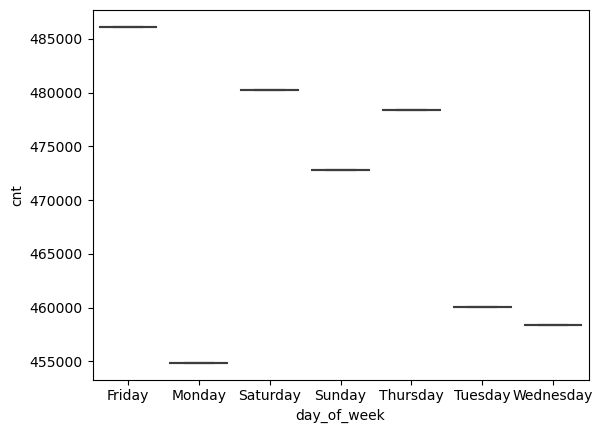

In [381]:
for i in range(len(ctg_col)):
    
    grouped_data = bike.groupby(ctg_col[i])['cnt'].sum().reset_index()

    sns.boxplot(x = ctg_col[i], y = 'cnt', data = grouped_data)
    plt.show()

### Step 4: Data Preparation

"Yr", "Holday" and "WorkingDay" are already binary variables.
We'll want to get dummy variables for season and weathersit

In [382]:
bike = pd.get_dummies(bike, columns=['season', 'weathersit', 'day_of_week'], drop_first=True)

In [383]:
bike.head()

yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt  ...  season_3  season_4  weathersit_2  weathersit_3  \
0  10.749882   985  ...         0         0             1             0   
1  16.652113   801  ...         0         0             1             0   
2  16.636703  1349  ...         0         0             0             0   
3  10.739832  1562  ...         0         0             0             0   
4  12.522300  1600  ...         0         0             0             0   

   day_of_week_Monday  day_of_week_Saturday  day_of_week_Sunday  \
0                   1                     0                   0   
1                   0                     0                   0   
2                   0                     0                   0   
3                   0                     0                   1   
4                   0                     0                   0   

   day_of_week_Thursday  day_of_week_Tuesday  day_of_week_Wednesday  
0                     0                    0                      0  
1                     1                    0                      0  
2                     1                    0                      0  
3                     0                    0                      0  
4                     0                    1                      0  

[5 rows x 29 columns]

### Step 5: Splitting the Data into Training and Testing Sets (Train/Test Split)

In [384]:
# Split data into Train & Test Datasets
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [385]:
scaler = MinMaxScaler()

In [386]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
bike_train[num_col] = scaler.fit_transform(bike_train[num_col])

In [387]:
bike_train.describe()

yr        mnth     holiday     weekday  workingday        temp  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.504456    0.025490    0.498366    0.676471    0.537262   
std      0.500429    0.315338    0.157763    0.336182    0.468282    0.225844   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.181818    0.000000    0.166667    0.000000    0.339853   
50%      1.000000    0.545455    0.000000    0.500000    1.000000    0.540519   
75%      1.000000    0.818182    0.000000    0.833333    1.000000    0.735215   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            atemp         hum   windspeed         cnt  ...    season_3  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.512989    0.650369    0.320768    0.513620  ...    0.262745   
std      0.212385    0.145882    0.169797    0.224593  ...    0.440557   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.332086    0.538643    0.199179    0.356420  ...    0.000000   
50%      0.526811    0.653714    0.296763    0.518638  ...    0.000000   
75%      0.688457    0.754830    0.414447    0.684710  ...    1.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

        season_4  weathersit_2  weathersit_3  day_of_week_Monday  \
count  510.00000    510.000000    510.000000          510.000000   
mean     0.24902      0.343137      0.029412            0.156863   
std      0.43287      0.475223      0.169124            0.364028   
min      0.00000      0.000000      0.000000            0.000000   
25%      0.00000      0.000000      0.000000            0.000000   
50%      0.00000      0.000000      0.000000            0.000000   
75%      0.00000      1.000000      0.000000            0.000000   
max      1.00000      1.000000      1.000000            1.000000   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
count            510.000000          510.000000            510.000000   
mean               0.133333            0.139216              0.147059   
std                0.340268            0.346511              0.354512   
min                0.000000            0.000000              0.000000   
25%                0.000000            0.000000              0.000000   
50%                0.000000            0.000000              0.000000   
75%                0.000000            0.000000              0.000000   
max                1.000000            1.000000              1.000000   

       day_of_week_Tuesday  day_of_week_Wednesday  
count           510.000000             510.000000  
mean              0.133333               0.145098  
std               0.340268               0.352545  
min               0.000000               0.000000  
25%               0.000000               0.000000  
50%               0.000000               0.000000  
75%               0.000000               0.000000  
max               1.000000               1.000000  

[8 rows x 29 columns]

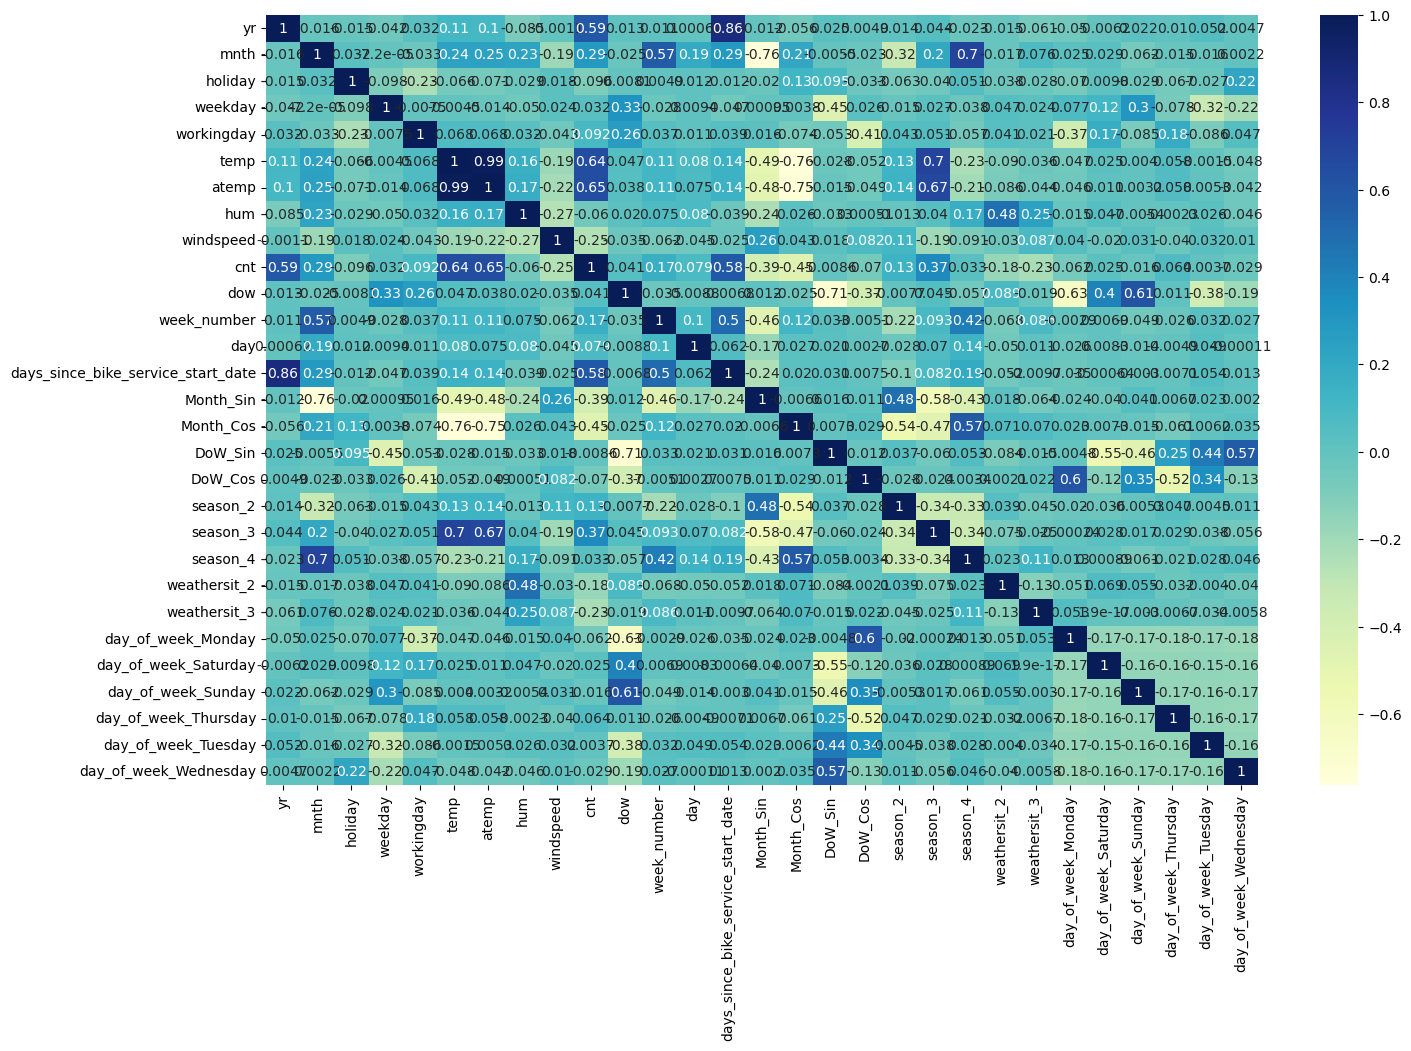

In [388]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Step 6: Model Training

In [389]:
# Separate features and target variable:
X_train = bike_train.drop('cnt', axis=1)
y_train = bike_train['cnt']

#### RFE
Recursive feature elimination

In [390]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [391]:
rfe = RFE(estimator=lm, n_features_to_select=10)           # running RFE
rfe = rfe.fit(X_train, y_train)

In [392]:
# Get the rankings of features
print(rfe.ranking_)

[ 1 14  1  5  8  1  4  1  1 10  1 11  1  2  7 18 12  1  6  1  3  1 19 15
  9 13 17 16]


In [393]:
# Get the selected features
print(rfe.support_)

[ True False  True False False  True False  True  True False  True False
  True False False False False  True False  True False  True False False
 False False False False]


In [394]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 14),
 ('holiday', True, 1),
 ('weekday', False, 5),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('dow', False, 10),
 ('week_number', True, 1),
 ('day', False, 11),
 ('days_since_bike_service_start_date', True, 1),
 ('Month_Sin', False, 2),
 ('Month_Cos', False, 7),
 ('DoW_Sin', False, 18),
 ('DoW_Cos', False, 12),
 ('season_2', True, 1),
 ('season_3', False, 6),
 ('season_4', True, 1),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1),
 ('day_of_week_Monday', False, 19),
 ('day_of_week_Saturday', False, 15),
 ('day_of_week_Sunday', False, 9),
 ('day_of_week_Thursday', False, 13),
 ('day_of_week_Tuesday', False, 17),
 ('day_of_week_Wednesday', False, 16)]

In [395]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'week_number',
       'days_since_bike_service_start_date', 'season_2', 'season_4',
       'weathersit_3'],
      dtype='object')

In [396]:
X_train.columns[~rfe.support_]

Index(['mnth', 'weekday', 'workingday', 'atemp', 'dow', 'day', 'Month_Sin',
       'Month_Cos', 'DoW_Sin', 'DoW_Cos', 'season_3', 'weathersit_2',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [397]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [398]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [399]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [400]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.0
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.42e-176
Time:                        22:43:15   Log-Likelihood:                 470.87
No. Observations:                 510   AIC:                            -919.7
Df Residuals:                     499   BIC:                            -873.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

`days_since_bike_service_start_date` and `week_number` have a P>|t| value > 0.05 and can be dropped.
Will try dropping variables one by one to see how stats change.

In [401]:
X_train_new = X_train_rfe.drop(["days_since_bike_service_start_date"], axis = 1)

#### Rebuilding the model without `days_since_bike_service_start_date`

In [402]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [403]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [404]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     246.6
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.43e-177
Time:                        22:43:15   Log-Likelihood:                 470.38
No. Observations:                 510   AIC:                            -920.8
Df Residuals:                     500   BIC:                            -878.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2482      0.028      8.964   

#### Rebuilding the model without `week_number`

In [405]:
X_train_new = X_train_new.drop(["week_number"], axis = 1)

In [406]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [407]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [408]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     276.6
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.22e-178
Time:                        22:43:15   Log-Likelihood:                 469.37
No. Observations:                 510   AIC:                            -920.7
Df Residuals:                     501   BIC:                            -882.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2555      0.027      9.388   

#### P>[t] value for all features is now < 0.05

##### R-squared and Adj. R-squared values are almost same indicating that all predictors significantly contribute to explaining the variance in the dependent variable.

In [409]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         const  39.94
7      season_4   1.24
4           hum   1.23
3          temp   1.16
5     windspeed   1.16
6      season_2   1.14
8  weathersit_3   1.11
1            yr   1.02
2       holiday   1.01

- constant has a very high VIF value. 
- We can choose to ignore its VIF since it's not an explanatory variable.

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [410]:
y_train_cnt = lm.predict(X_train_lm)

C:\Users\visha\AppData\Local\Temp\ipykernel_22212\2864329838.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

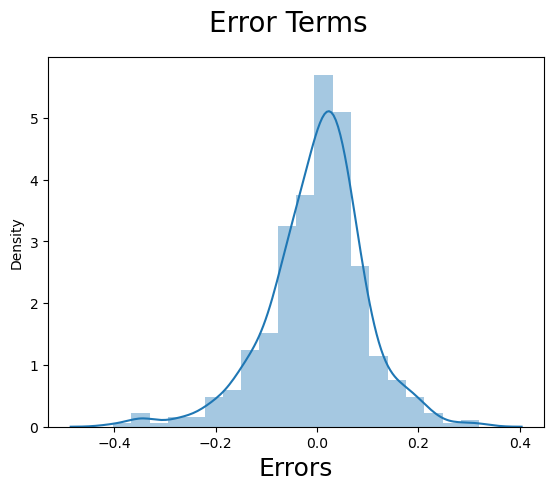

In [411]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [412]:
import scipy.stats as stats

In [413]:
# Get the residuals
residuals = lm.resid

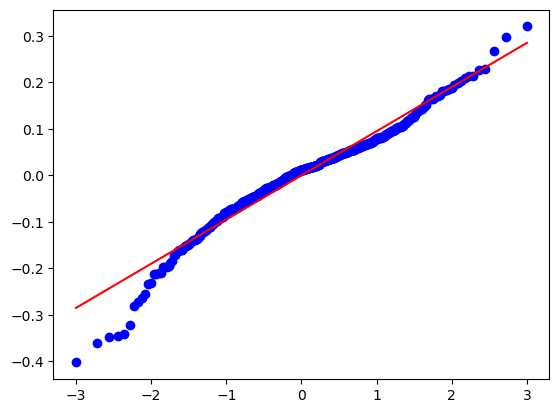

In [414]:
# Create a Q-Q plot for the residuals to check for normality
stats.probplot(residuals, dist="norm", plot=plt)

plt.show()

##### The dropping off at 2 deviations and more indicates that there might be a few outliers and the model can still be improved but in general the model seems to be fairly good as they stick around the line

### Making Predictions

#### Applying the scaling on the test sets

In [415]:
num_col

['mnth',
 'weekday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt',
 'day',
 'week_number',
 'Month_Sin',
 'Month_Cos',
 'dow',
 'week_number',
 'days_since_bike_service_start_date',
 'Month_Sin',
 'Month_Cos',
 'DoW_Sin',
 'DoW_Cos']

In [416]:
bike_test[num_col] = scaler.transform(bike_test[num_col])

#### Dividing into X_test and y_test

In [417]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [418]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'weathersit_3'],
      dtype='object')

In [419]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [420]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [421]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

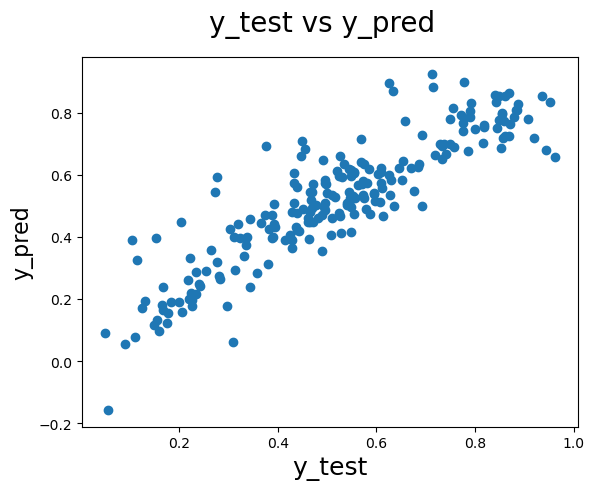

In [422]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)         

#### Model's predictions align with the actual outcomes.indicating that it's a good model

In [423]:
print(lm.params)

const           0.255517
yr              0.226627
holiday        -0.082555
temp            0.618103
hum            -0.256821
windspeed      -0.210231
season_2        0.074561
season_4        0.140066
weathersit_3   -0.192367
dtype: float64


In [424]:
# Formulate the regression equation
params = lm.params # Extract coefficients
equation = "y = " + " + ".join([f"{coef:.2f} * {col}" if col != 'const' else f"{coef:.2f}" for col, coef in params.items()])
print("Regression Equation:")
print(equation)

Regression Equation:
y = 0.26 + 0.23 * yr + -0.08 * holiday + 0.62 * temp + -0.26 * hum + -0.21 * windspeed + 0.07 * season_2 + 0.14 * season_4 + -0.19 * weathersit_3


In [425]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     276.6
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.22e-178
Time:                        22:43:16   Log-Likelihood:                 469.37
No. Observations:                 510   AIC:                            -920.7
Df Residuals:                     501   BIC:                            -882.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2555      0.027      9.388      0.000       0.202       0.309
yr               0.2266      0.009     25.990      0.000       0.209       0.244
holiday         -0.0826      0.027     -3.006      0.003      -0.137      -0.029
temp             0.6181      0.021     30.036      0.000       0.578       0.659
hum             -0.2568      0.033     -7.824      0.000      -0.321      -0.192
windspeed       -0.2102      0.027     -7.699      0.000      -0.264      -0.157
season_2         0.0746      0.011      6.965      0.000       0.054       0.096
season_4         0.1401      0.011     12.642      0.000       0.118       0.162
weathersit_3    -0.1924      0.027     -7.177      0.000      -0.245      -0.140
==============================================================================
Omnibus:                       52.894   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.997
Skew:                          -0.591   Prob(JB):                     7.90e-25
Kurtosis:                       4.956   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking for generalization

In [426]:
y_train_pred = lm.predict(X_train_lm)

In [427]:
# Calculate R-squared and RMSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print("Training R-squared:", r2_train)
print("Test R-squared:", r2_test)
print("Training RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Training R-squared: 0.815413818158554
Test R-squared: 0.7888348878043207
Training RMSE: 0.0963981741078568
Test RMSE: 0.10014717997467051


In [428]:
r2_train - r2_test

0.02657893035423331

#### Since the difference between the two r-squares is less than 5 we can say that the model generalizes well